In [1]:
## 首先调用`s0_download_ERA5.py`下载最新的ERA5数据

from main_pkgs import *
import metpy
import metpy.calc as mpcalc


indir = "scripts"
prefix = "%s/ERA5_Asia_202206-202207" % indir

f_pres = "%s_pressure_level.nc" % prefix
f_prcp = "%s_prcp.nc" % prefix

ds_surf_raw = xr.open_dataset(f_prcp)
ds_surf = ds_surf_raw.resample(time = "6h", restore_coord_dims = True).sum()

ds_lev = xr.open_dataset(f_pres)
ds = ds_lev.merge(ds_surf, join="inner")

dates = xr_date(ds)
d = pd.DataFrame({
  "date": date(dates), 
  "hour": hour(dates),
})

dates
geoheight = mpcalc.geopotential_to_height(ds_lev.sel(level=500.0)["z"])/10 # 


working dir:  D:\GitHub\cug-hydro\CUG-HydroMeteorology.py


Figures//ERA5_z500_01.pdf


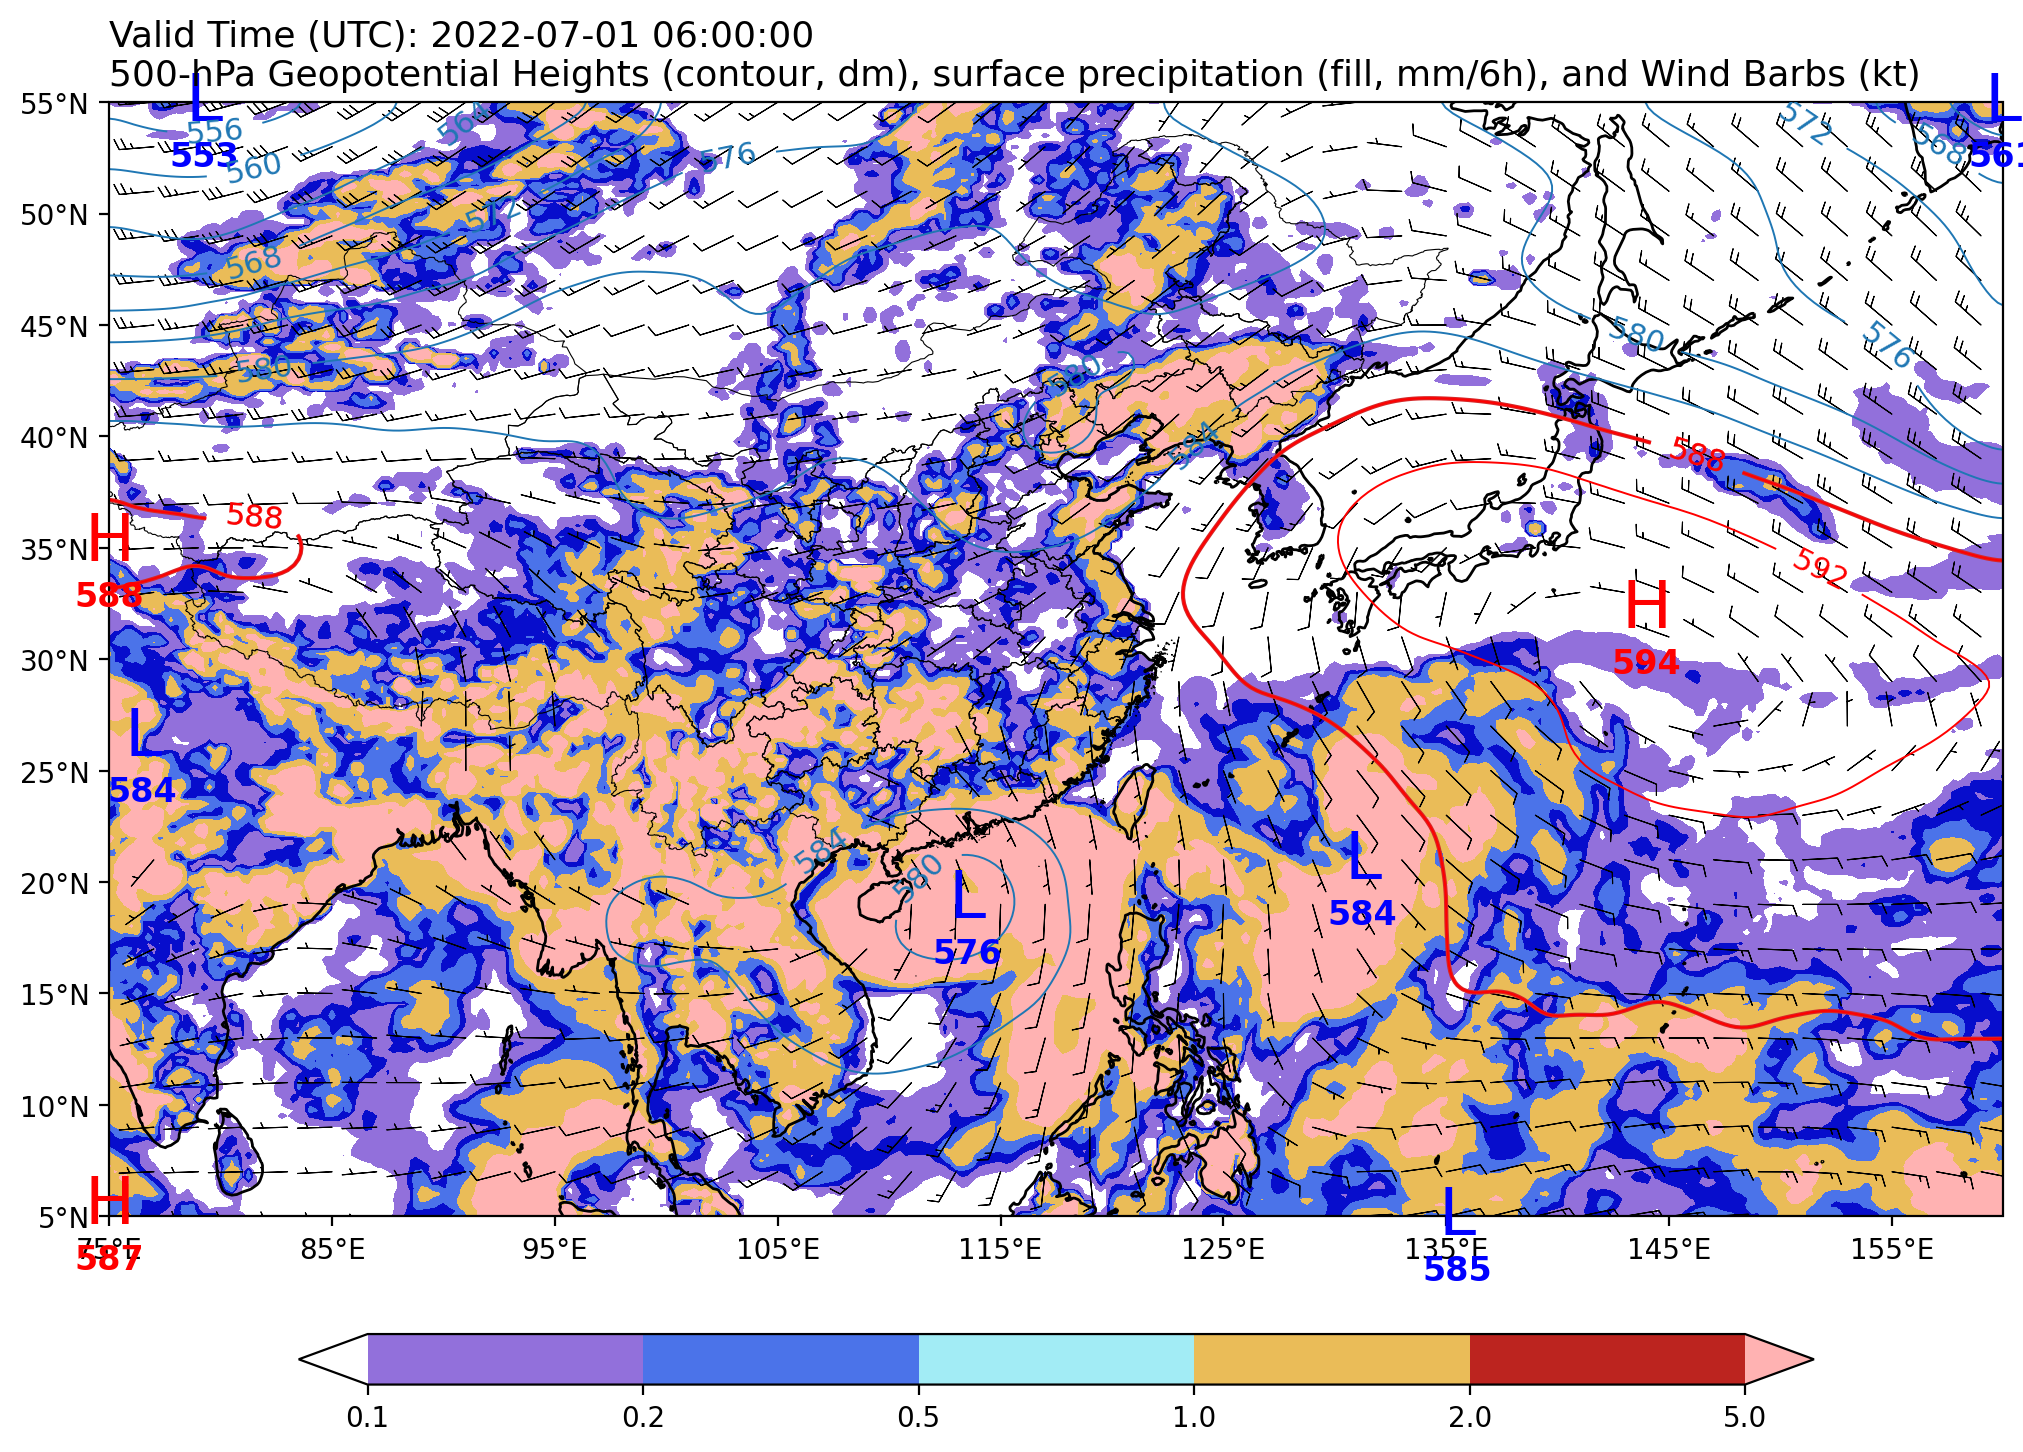

In [2]:
from rbase import *

def plot_prcp(i = 0, p_prcp=True, lev=500):
  fig = plt.figure(1, figsize=(10., 7.2), constrained_layout=True, dpi=200)
  fig.clf()
  ax = plt.axes(projection=ccrs.PlateCarree())

  time = dates[i]
  # 1. precipitation
  if p_prcp:
    x = ds["tp"].sel(time = time)
    r_contourf(x*1000, brks = [0.1, 0.2, 0.5, 1, 2, 5])
  
  # 2. geoheight
  z = geoheight.sel(time = time)
  z.values = gaussian_filter(z.values, sigma = 3)
  contour_z(z, half=20)
  nsize = 100
  plot_maxmin_points(z, nsize, "max", "H", "red")
  plot_maxmin_points(z, nsize, "min", "L", "blue")
  
  # 3. wind
  add_wind(ds.sel(level = 500, time = time), step=8, length = 5, linewidth=0.4)
  
  add_china(range = [75, 160, 5, 55])
  plt.title('Valid Time (UTC): {}\n'.format(time) + 
      '500-hPa Geopotential Heights (contour, dm), surface precipitation (fill, mm/6h), and Wind Barbs (kt)', loc='left', fontsize = 13)
  
  outdir = "Figures/"
  fout = "%s/ERA5_z500_%02d.pdf" % (outdir, i)
  print(fout)
  write_fig(fout, 10, 7.2, forward=False)
  # plt.savefig(fout)

plot_prcp(1)


Figures//ERA5_z500_00.pdf
Figures//ERA5_z500_01.pdf
Figures//ERA5_z500_02.pdf
Figures//ERA5_z500_03.pdf
Figures//ERA5_z500_04.pdf
Figures//ERA5_z500_05.pdf
Figures//ERA5_z500_06.pdf
Figures//ERA5_z500_07.pdf
Figures//ERA5_z500_08.pdf
Figures//ERA5_z500_09.pdf
Figures//ERA5_z500_10.pdf
Figures//ERA5_z500_11.pdf
Figures//ERA5_z500_12.pdf
Figures//ERA5_z500_13.pdf
Figures//ERA5_z500_14.pdf
Figures//ERA5_z500_15.pdf
Figures//ERA5_z500_16.pdf
Figures//ERA5_z500_17.pdf
Figures//ERA5_z500_18.pdf
Figures//ERA5_z500_19.pdf
Figures//ERA5_z500_20.pdf
Figures//ERA5_z500_21.pdf
Figures//ERA5_z500_22.pdf
Figures//ERA5_z500_23.pdf


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

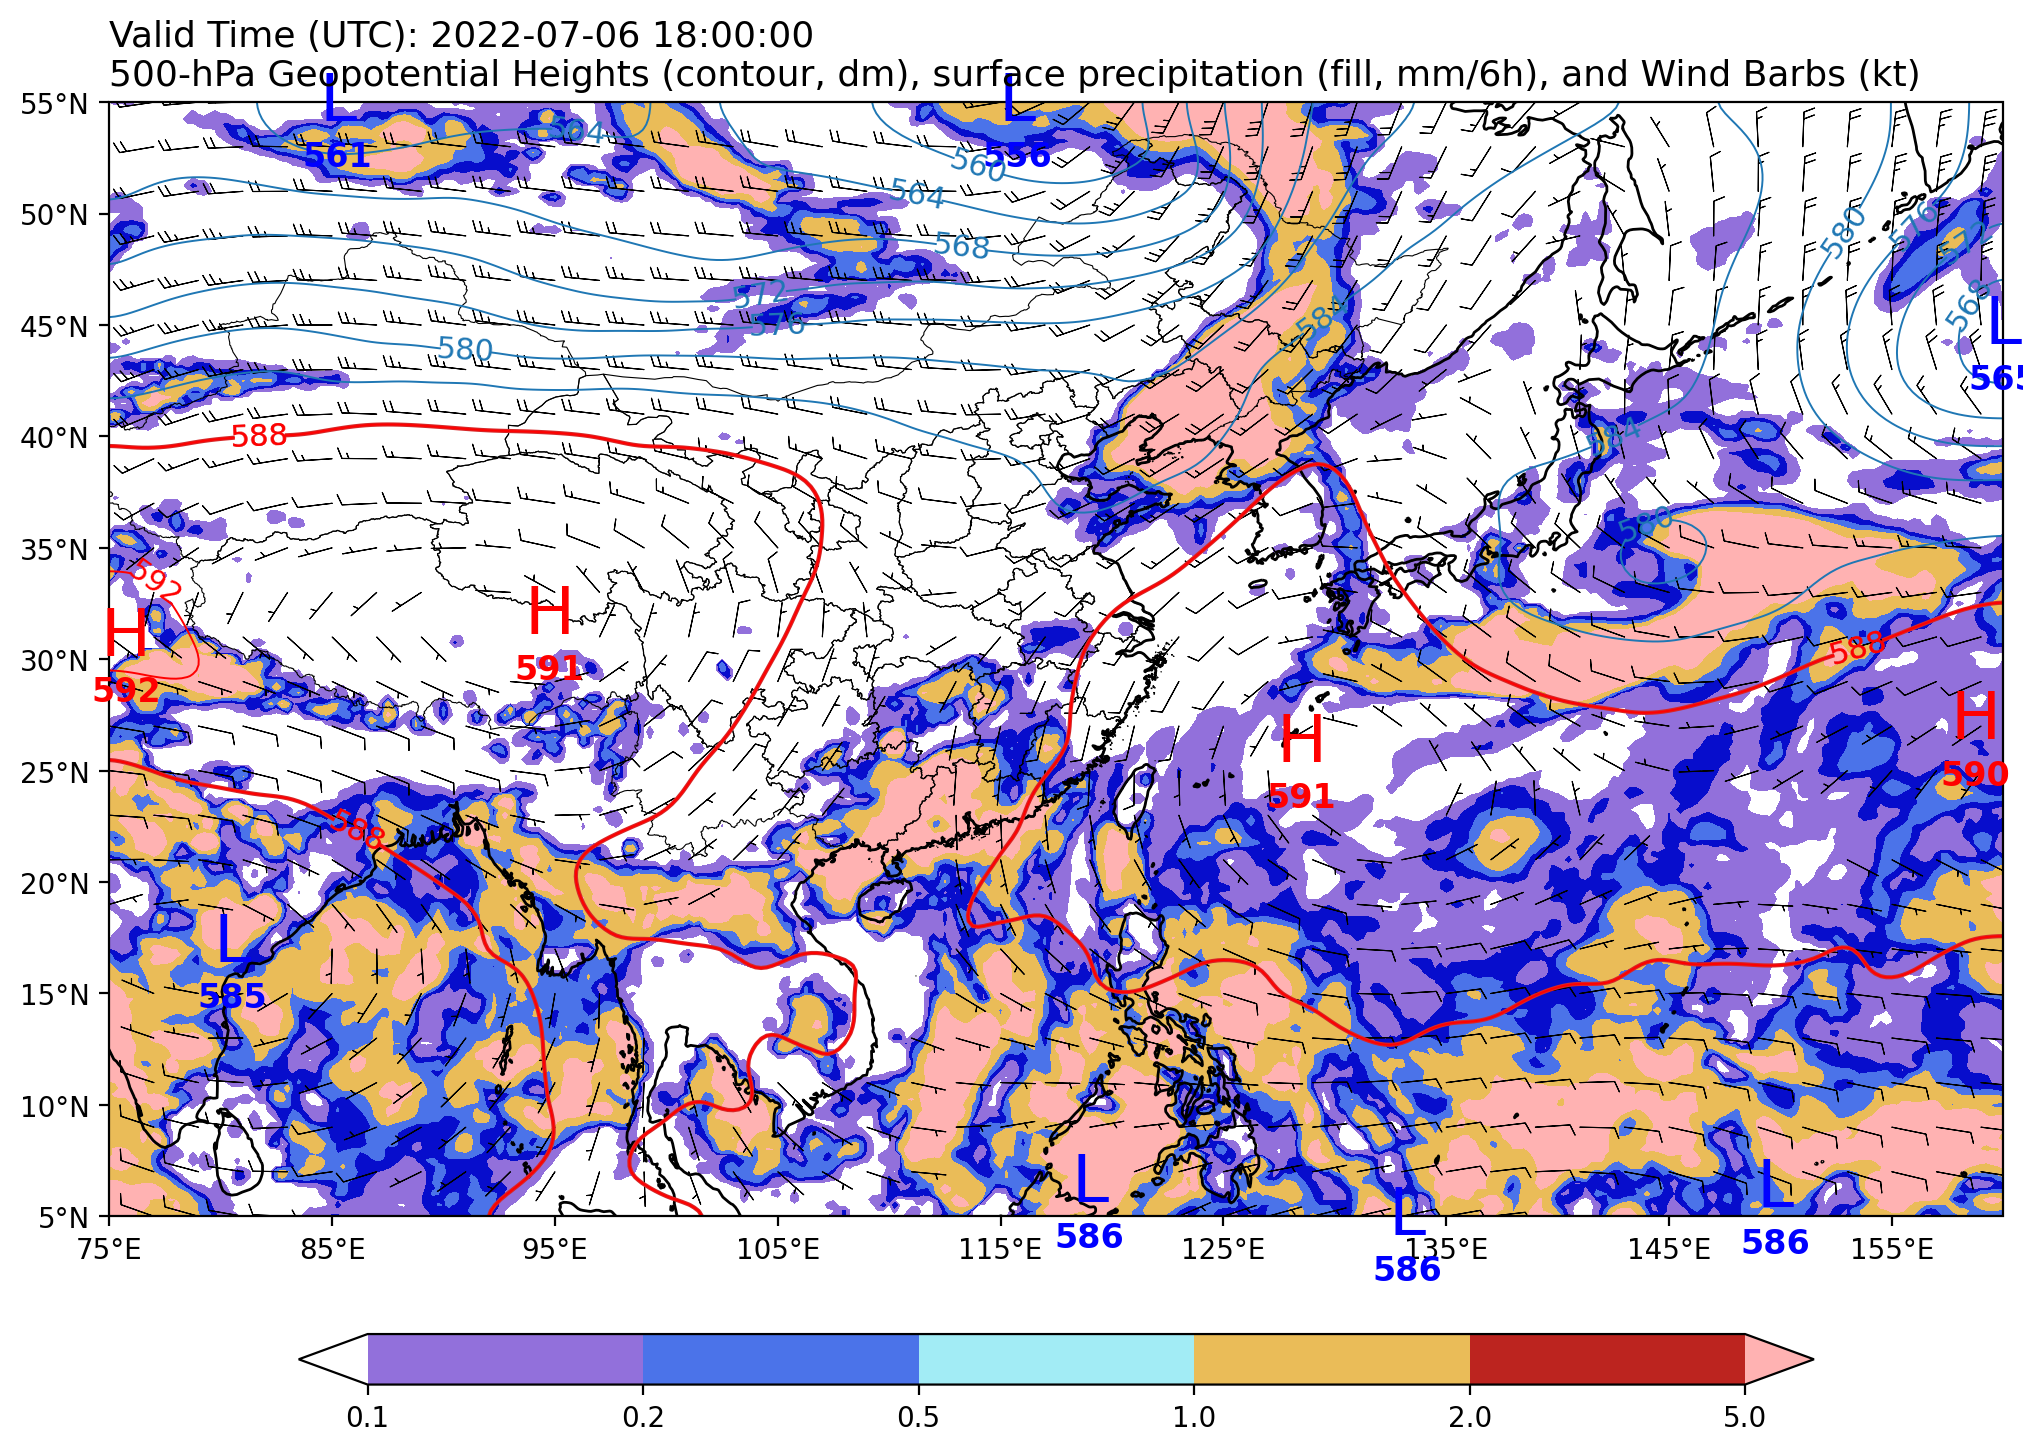

In [3]:
# 循环运行所有
n = length(dates)
[plot_prcp(i) for i in range(0, n)]


In [ ]:
# files = glob("Figures/*.pdf")
## 将所有pdf合并成一个文件

from rbase import *

pdfs = r_dir("Figures", "*.pdf")
merge_pdf(pdfs, "ERA5_prcp.pdf", delete=False)

# imgs = r_dir("Figures/", "*.jpg")
# images2gif(imgs, "ERA5_prcp_202205.gif", duration=500)
# images2pdf(imgs, "ERA5_prcp_202205.pdf")
